### Project - Customer Credit Card Data

Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

Objective: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?


In [68]:
#Claire Bilski link to GitHub
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-claireebilski.git

SyntaxError: invalid syntax (<ipython-input-68-159f5d587569>, line 2)

#### 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the
notebook and conclude your insights from the graphs. (5 marks)

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns   
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

from sklearn import metrics

In [5]:
data = pd.read_excel('Credit Card Customer Data.xlsx')
datadf = pd.DataFrame(data)

In [6]:
#Apply info to check datatype
datadf.info()
datadf.describe() #statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
datadf.shape

(660, 7)

In [8]:
#Finding the number of missing values in datadf
datadf.isnull().values.any() # No null values

False

In [9]:
#Number of unique in each column
datadf.nunique()
#Can drop sl_no

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

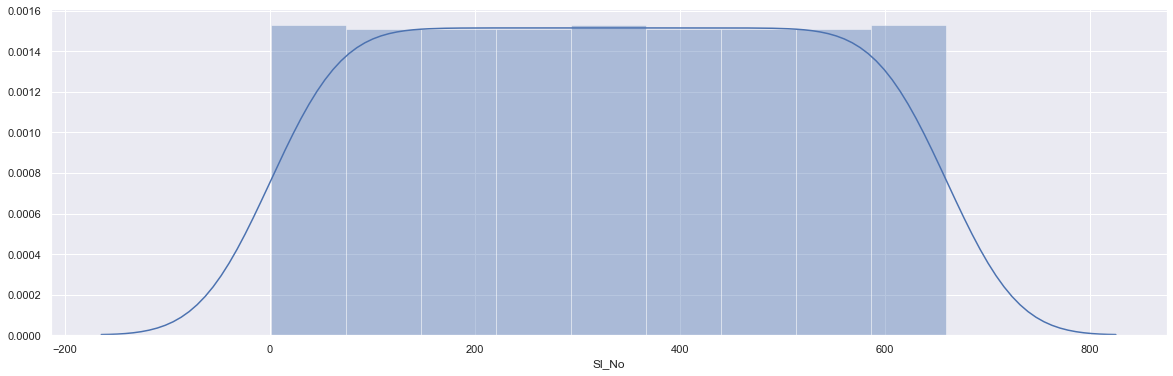

In [118]:
#Distplot for SL number (quantitative variable)
df1 = datadf['Sl_No']
plt.figure(figsize=(20,6))
sns.distplot(df1) 
df1.describe()
#Almost normal distribution centered around 330.5. 1 - 660. Dropping this column.
data_df = datadf.drop('Sl_No', axis=1)

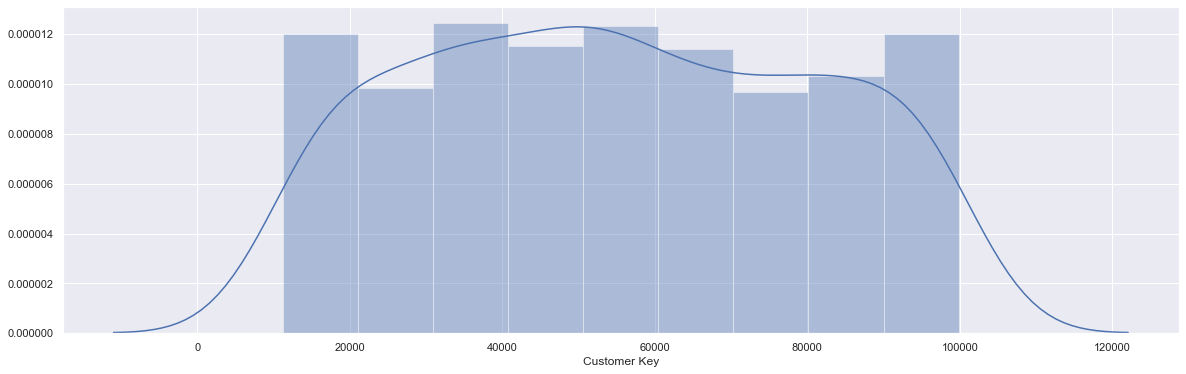

In [119]:
#Distplot for Customer Key (quantitative variable)
df2 = data_df['Customer Key']
plt.figure(figsize=(20,6))
sns.distplot(df2)
df2.describe()
#Almost normal distribution of spread follows similar pattern as the Sl No distribution, except different number values from 11265 - 99843.
#Countplot shows there are some duplicate Customer Keys. I believe this column can be dropped as it does not relate to segmenting the customer data.
data_df = data_df.drop('Customer Key', axis=1)

In [120]:
data_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


count       660.000000
mean      34574.242424
std       37625.487804
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

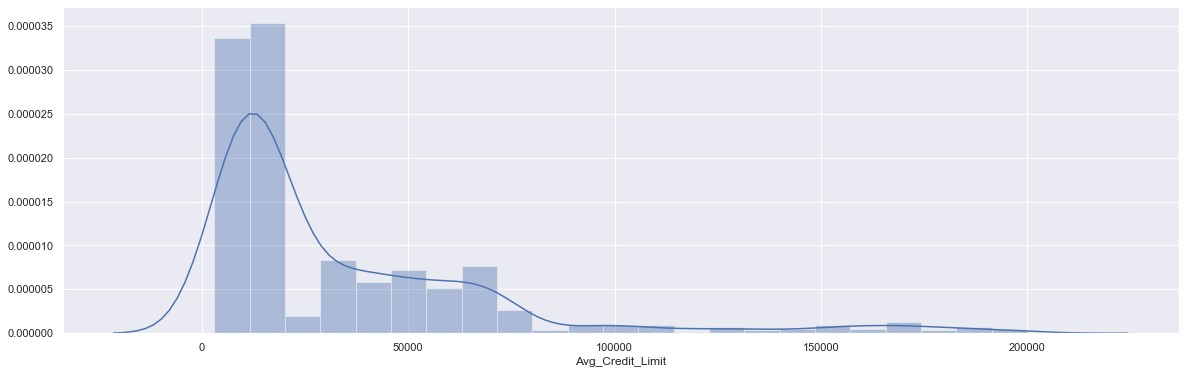

In [106]:
#Distplot for Avg_Credit_Limit (quantitative variable)
df3 = data_df['Avg_Credit_Limit']
plt.figure(figsize=(20,6))
sns.distplot(df3)
df3.describe()
#Skewed right, Avg around 18000, 50% of the data falls below 18000.

count    660.000000
mean       4.706061
std        2.167835
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: Total_Credit_Cards, dtype: float64

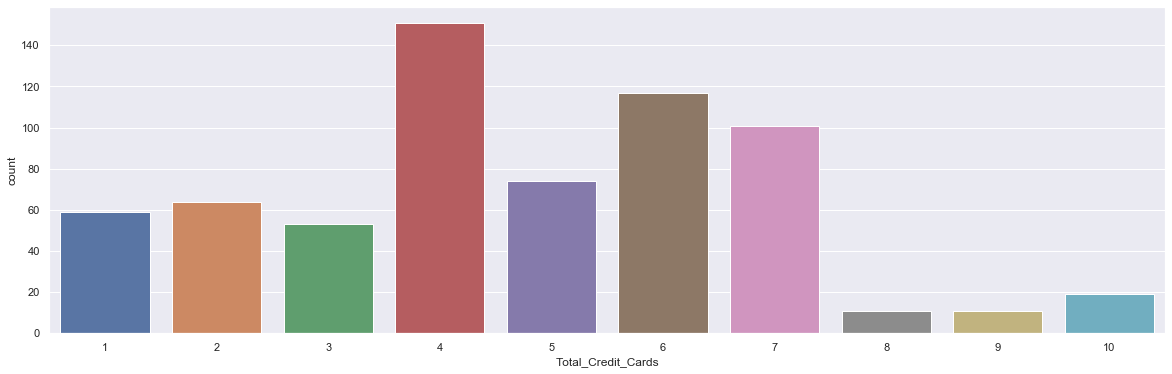

In [107]:
#Distplot for Total_Credit_Cards (quantitative variable)
df4 = data_df['Total_Credit_Cards']
plt.figure(figsize=(20,6))
sns.countplot(df4)
df4.describe()

count    660.000000
mean       2.403030
std        1.631813
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Total_visits_bank, dtype: float64

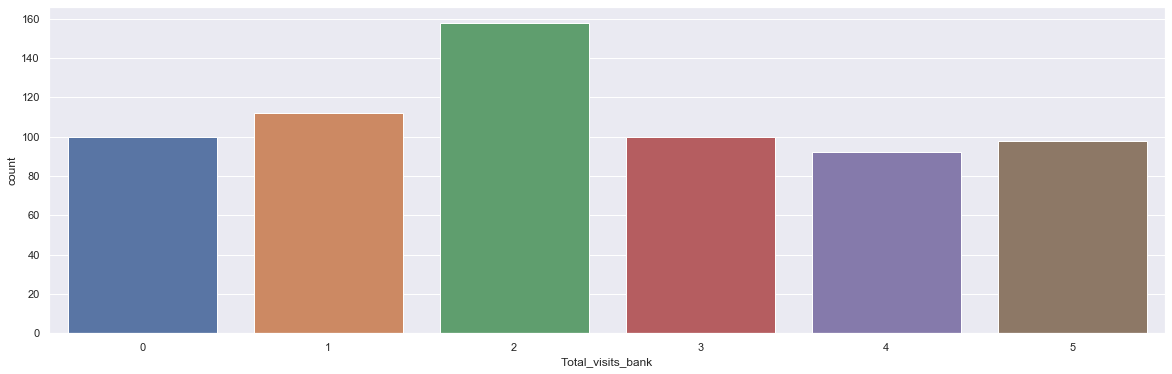

In [108]:
#Distplot for Total_visits_bank (quantitative variable)
df5 = data_df['Total_visits_bank']
plt.figure(figsize=(20,6))
sns.countplot(df5)
df5.describe()
#Majority of customers have 2 credit cards. The second greatest category is 1. 0 and 3 are about the same. 5 is only slightly lower. And then 4 is slightly lower than 5.  

count    660.000000
mean       2.606061
std        2.935724
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: Total_visits_online, dtype: float64

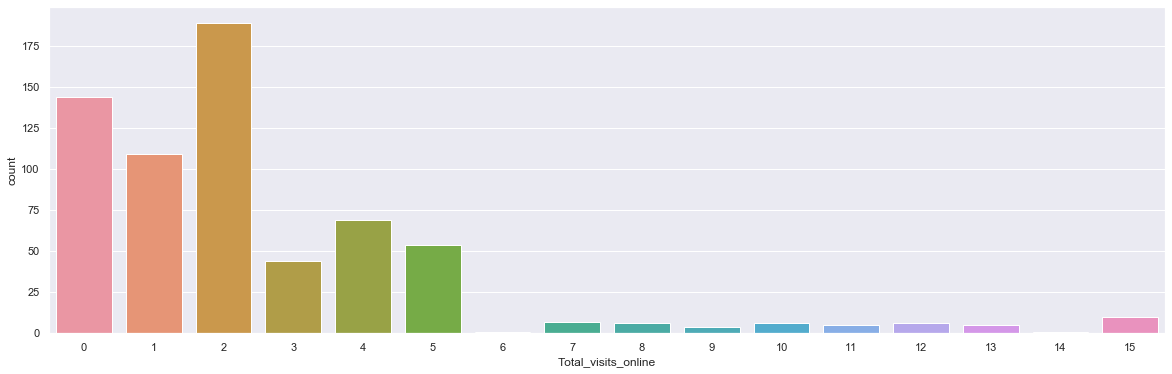

In [109]:
#Distplot for Total_visits_online (quantitative variable)
df6 = data_df['Total_visits_online']
plt.figure(figsize=(20,6))
sns.countplot(df6)
df6.describe()
#A majority of customers (180) have 2 total visits online. Approx 140 customers have 0 visits online. Approx 110 customers have 1 online visit. 3, 4, and 5 visits have the middle bulk of data; and then the count of customers gets slightly lower as the number of visits increases. 

count    660.000000
mean       3.583333
std        2.865317
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Total_calls_made, dtype: float64

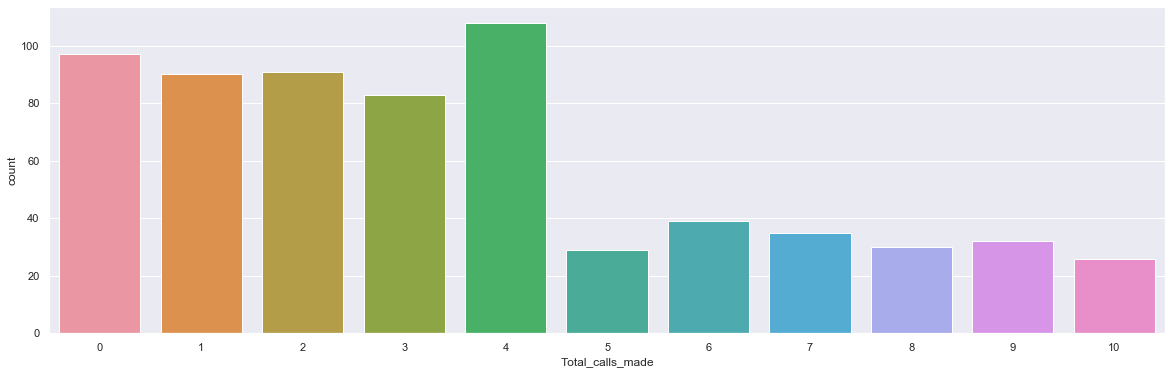

In [110]:
#Distplot for Total_calls_made (quantitative variable)
df7 = data_df['Total_calls_made']
plt.figure(figsize=(20,6))
sns.countplot(df7) 
df7.describe()
#The largest number of customers (approx 130) made 4 calls. A bulk of the data also lies within 0 - 3 calls. Fewer customers made more than 4 calls.

In [121]:
#Correlation matrix 
data_df.corr()  

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352,0.126789
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251,0.195051
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016,0.545845
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299,0.057730
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000,-0.202485
GROUP,0.126789,0.195051,0.545845,0.057730,-0.202485,1.000000


In [122]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


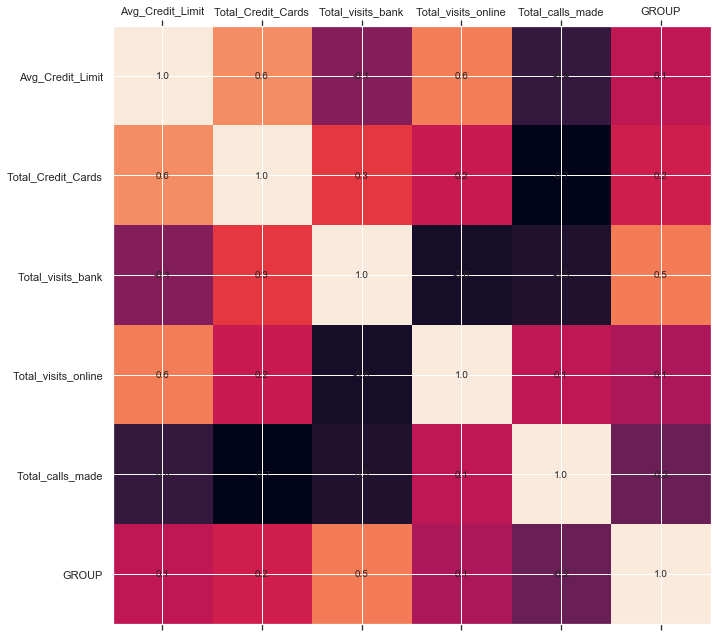

In [123]:
#Mutivariate Analysis
plot_corr(data_df)
#Cement has the highest corr. with strength. 
#Superplastic-ash, superplastic-strength have next highest corr.
#Age-strength, age-water have next highest.

In [ ]:
#### 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [124]:
from scipy.stats import zscore

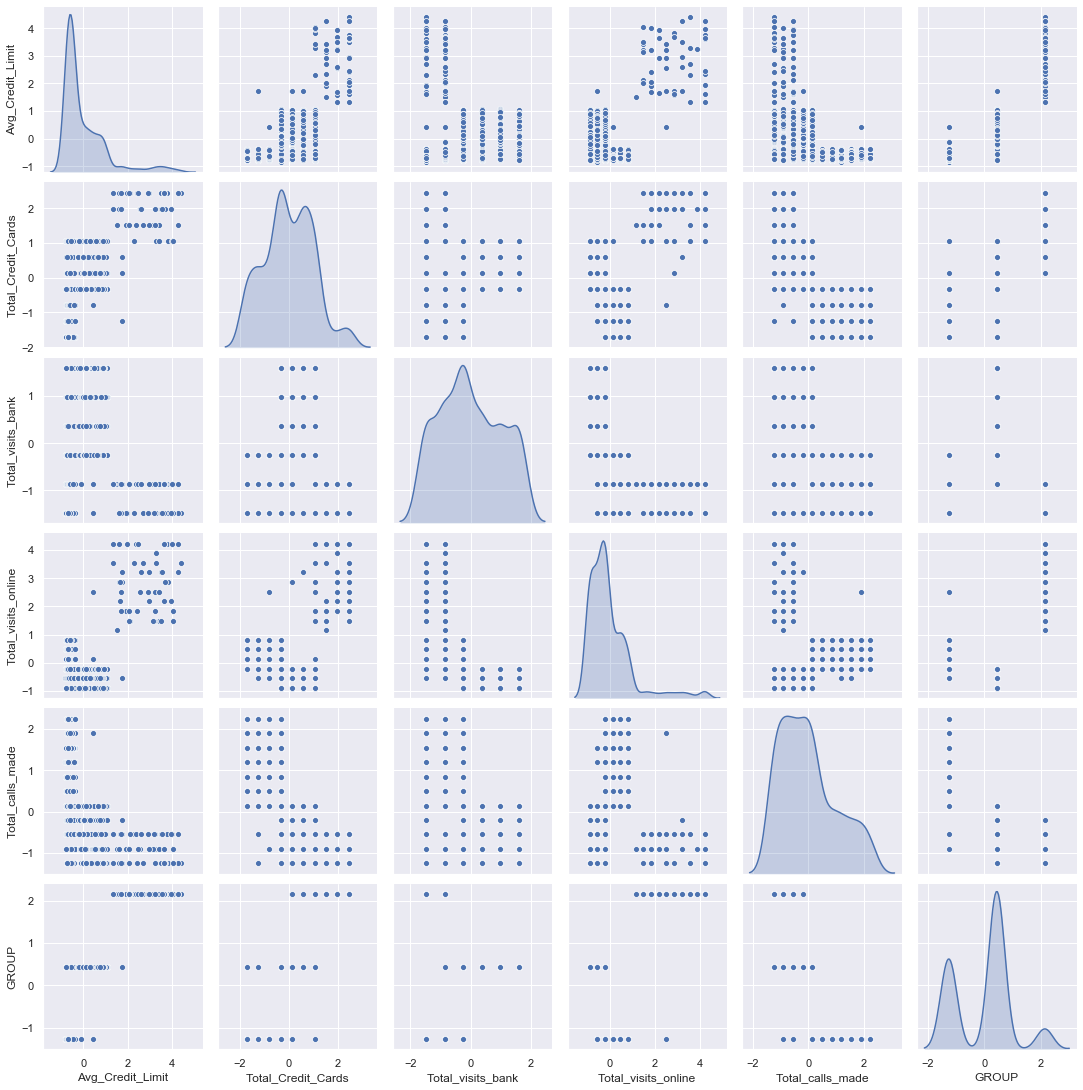

In [197]:
datadfAttr=data_df.iloc[:,0:]
datadfScaled=datadfAttr.apply(zscore)
sns.pairplot(datadfScaled,diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

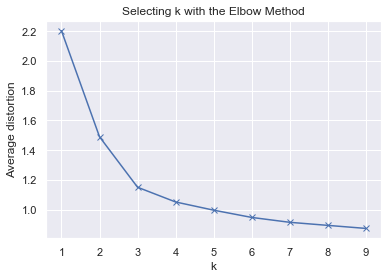

In [198]:
from sklearn.cluster import KMeans
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(datadfScaled)
    prediction=model.predict(datadfScaled)
    meanDistortions.append(sum(np.min(cdist(datadfScaled, model.cluster_centers_, 'euclidean'), axis=1)) / datadfScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [199]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(datadfScaled)
prediction=final_model.predict(datadfScaled)

#Append the prediction 
data_df["GROUP"] = prediction
datadfScaled["GROUP"] = prediction
print("Groups Assigned : \n")
data_df.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


In [200]:
datadfClust = data_df.groupby(['GROUP'])
datadfClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,33619.170984,5.5000,3.494819,0.981865,2.000000
1,12455.357143,2.4375,0.924107,3.553571,6.870536
2,141040.000000,8.7400,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2c9e55a50>,
      dtype=object)

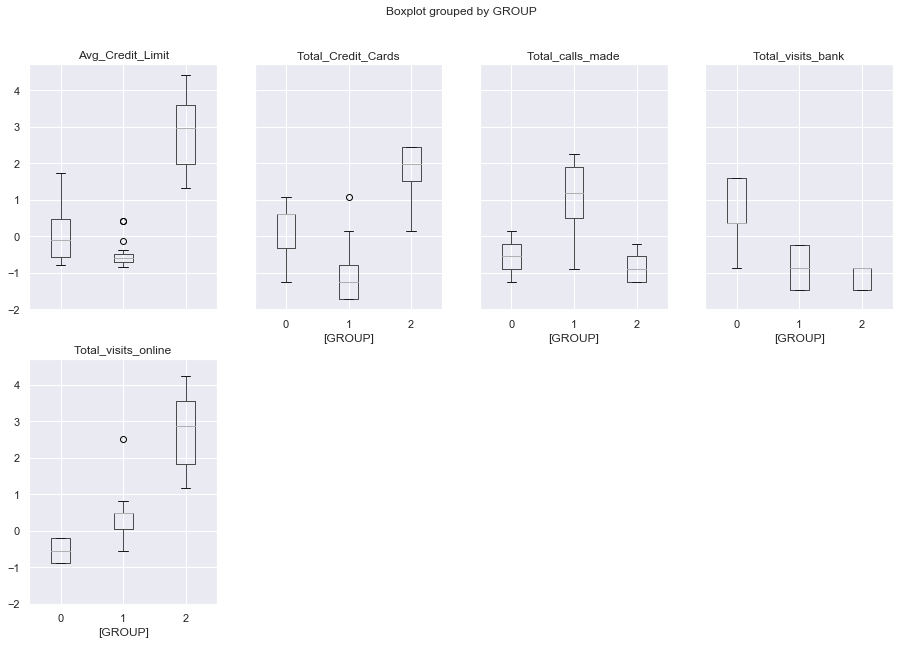

In [201]:
datadfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [26]:
#### 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [202]:
new_df = data_df.drop('GROUP', axis=1)

In [203]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(new_df),columns=new_df.columns)

In [204]:
X_std.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [205]:
datadfAttr=new_df.iloc[:,0:]
datadfAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [206]:
datadfScaled=datadfAttr.apply(zscore)
datadfScaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


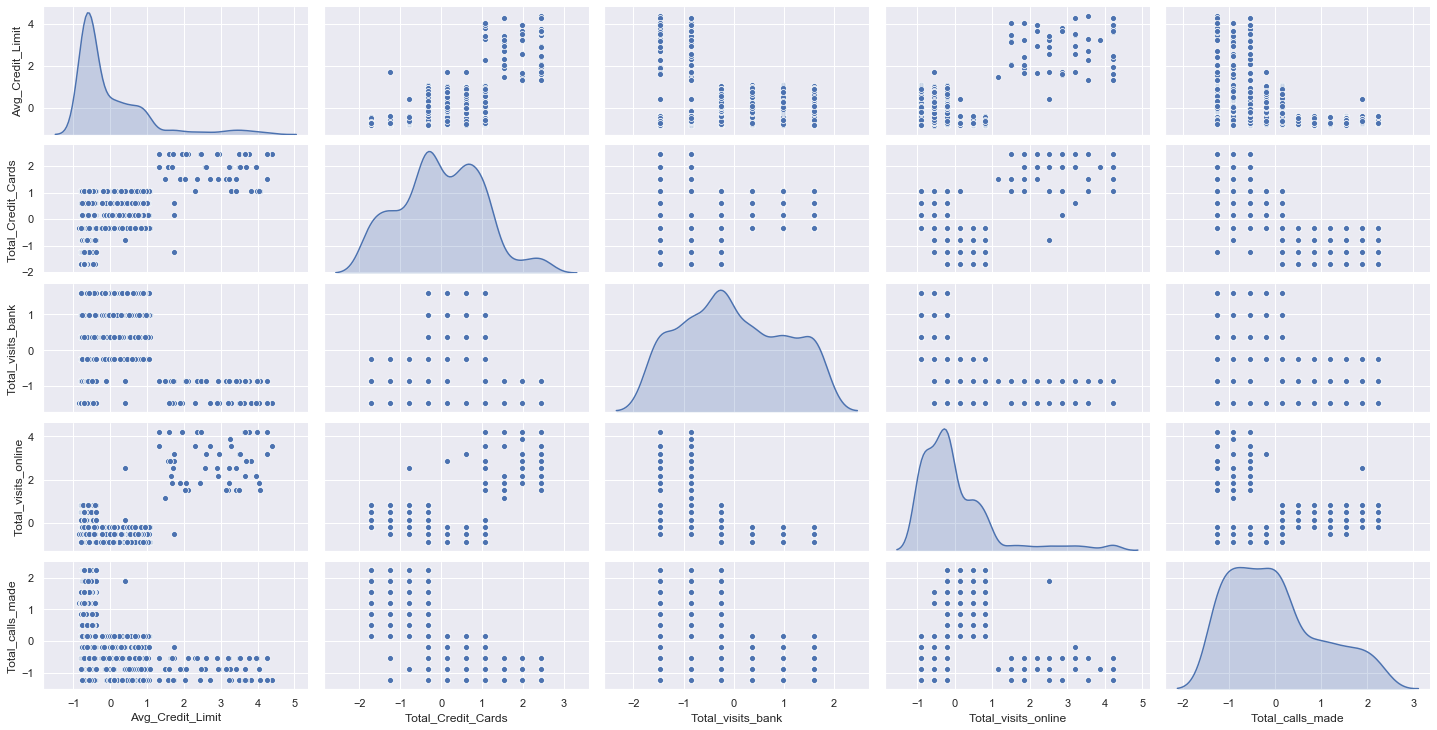

In [207]:
#importing seaborn for statistical plots
sns.pairplot(datadfScaled, height=2,aspect=2 , diag_kind='kde')

In [208]:
from sklearn.cluster import AgglomerativeClustering 

In [209]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [210]:
model.fit(datadfScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [211]:
datadfAttr['labels'] = model.labels_
datadfAttr.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [212]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [213]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [214]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(datadfScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(datadfScaled))

c

0.8977080867389372

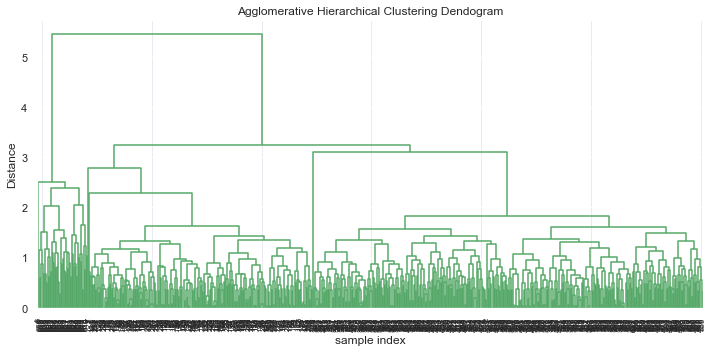

In [215]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [216]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(datadfScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(datadfScaled))

c

0.8599730607972423

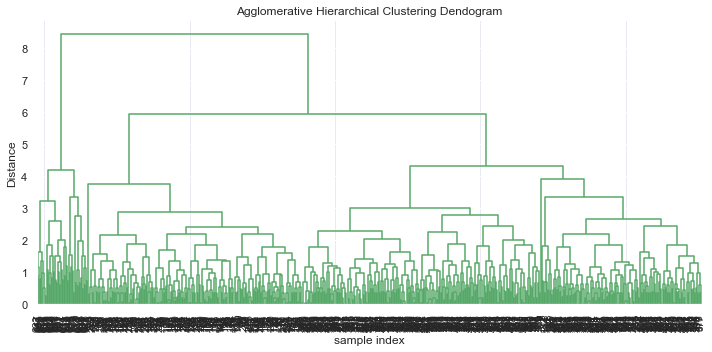

In [217]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [218]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(datadfScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(datadfScaled))

c

0.7415156284827493

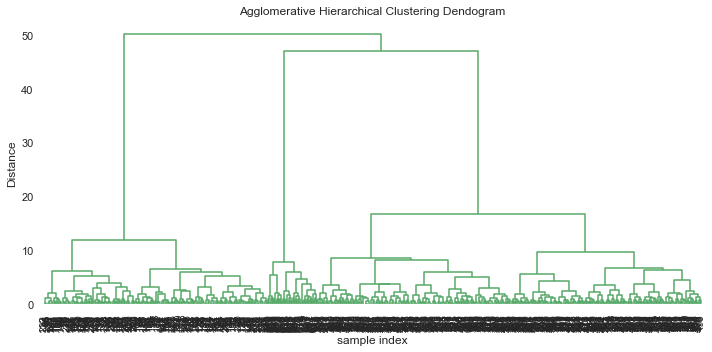

In [219]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

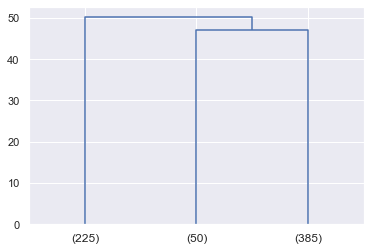

In [220]:
# find out the optimal distance between clusters which u want to use an input for clustering data¶
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [186]:
max_d = 47

In [221]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [223]:
#Append the prediction 
data_df["GROUP"] = clusters
datadfScaled["GROUP"] = clusters
print("Group Assigned : \n")
data_df.head()

Group Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,3
1,50000,3,0,10,9,1
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2d031ad50>,
      dtype=object)

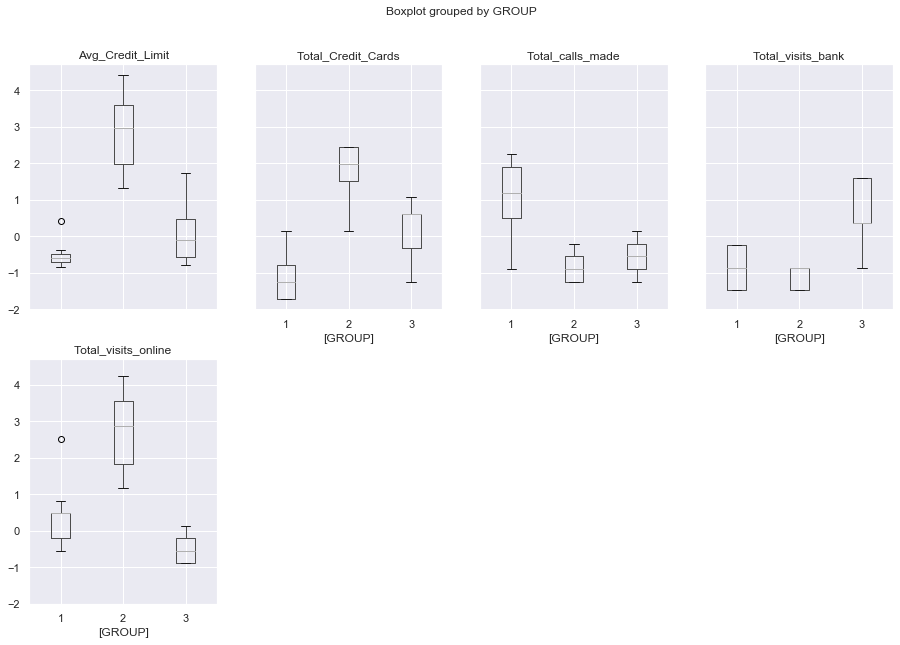

In [224]:
#Create boxplot for hiearchical clustering
datadfScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [225]:
#### 5. Calculate average silhouette score for both methods. (5 marks)

In [226]:
# Calculate Avg Silhoutte Score for hiearchical clustering

from sklearn.metrics import silhouette_score
silhouette_score(X_std,clusters)

0.5147639589977819

In [227]:
# Calculate Avg Silhoutte Score for K-means clustering

from sklearn.metrics import silhouette_score
silhouette_score(datadfScaled,clusters)

0.5903021800538141

In [ ]:
#### 6. Compare K-means clusters with Hierarchical clusters. (5 marks)

# Based on the means clusters for the K-means clusters are further apart from each other and are more clearly distinguished than the hiearchical clustering. 
# For both silhoutte scores, they are each closer to 0.5 (in between 0 and 1) so I would say they that clusters for both are moderately distinguished from one another.
# This is good news, as they are both fairly comparable in distance but offer different advantages and disadvantages such as those listed here, https://www.geeksforgeeks.org/difference-between-k-means-and-hierarchical-clustering/#:~:text=K%2D%20means%20clustering%20a%20simply,are%20arranged%20as%20a%20tree.
# Ultimately, we will end up using K-means clusters. (I will do analysis for both for the bank - in the event that there were other dependencies (and out of my own curiosity))
# For future reference: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

In [ ]:
#### 7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

#K-means Analysis
#How many different segments of customers are there? 
## There ended up being 3 different Groups of Credit Card customers.
#How are these segments different from each other?
# Group 0 is characterised by the mid range of Avg Credit Limit, mid range number of Total Credit Cards, low number of calls made, HIGH number of bank visits, and super small number of online visits.
# Group 1 - Lower number of avg credit limit, lower Total Number of Credt Cards, high number of calls made, low total number of bank visits, medium range of total visits online.
# Group 2 - Highest range of Avg Credit Limit, Highest number of total credit cards, lower number of calls made, lowest number of total bank visits, and extremely high number of total online visits.
#What are your recommendations to the bank on how to better market to and service these customers?
## The highest number of customers who have higher range of credit and the highest number of credit cards use the online banking service. 
## The marketing team should focus their efforts here when retaining customers who purchase or open new cards. 
## Based on the other two Groups - mid range of credit and number of credit card holders visited the bank in person. This should be the second avenue of marketing for the marketing team.
## Fianlly the last customer segment with lowest avg credit limit and lowest number of credit cards made phone calls. This should be the area the marketing team focuses on least. 

#Hiearchical clustering Analysis
#How many different segments of customers are there?
## There ended up being 3 different Groups of Credit Card customers.
#How are these segments different from each other?
# Group 0 is characterised by lowest range of Avg Credit Limit, lowest number of Total Credit Cards, highest number of calls made, lower number of bank visits, mid range of total visits online. 
# Group 1 - Highest number of Avg Credit Limit, highest number of Total Credit Cards, lowest number of calls made, lowest number of bank visits, highest number of total visits online.
# Group 2 - Low number of Avg Credit Limit, Mid range of total credit cards, lower number of calls made, highest number of bank visits, lowest number of total visist online. 
#What are your recommendations to the bank on how to better market to and service these customers?
## Hiearchical clusting analysis also supports the recommendations made in the K-means analysis; user groups follow a similar pattern. 